# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [149]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [150]:
df = pd.read_csv('used_device_data.csv')


## Data Overview
- Observations
- Sanity checks

In [151]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [152]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [153]:
df.shape

(3454, 15)

Observation:
There are 3454 rows and 15 columns in the data

In [154]:
data = df.copy()

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation:
The release_year and days_used columns are of int64 data type. There are four object type columns and the rest are all floats.
From the non-null count, we can see that some columns have missing values as their total count does not total up to the total number of rows in the data frame

In [156]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Observations:
- There are 33 brands in the data and a category Others too.
- Android is the most common OS for the used devices.
- The weight ranges from 69g to 855g. This seems correct as the data contains both phones and tablets.
- There are a few unusually low values for the internal memory and RAM of used devices, but those are likely due to the presence of feature phones in the data.

In [157]:
data.duplicated().sum()

0

In [158]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:
- There are no duplicate values.
- There are missing values in 6 columns. I will determine if they need to be dealt with after EDA

In [159]:
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [160]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, hue="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

1. What does the distribution of normalized used device prices look like?

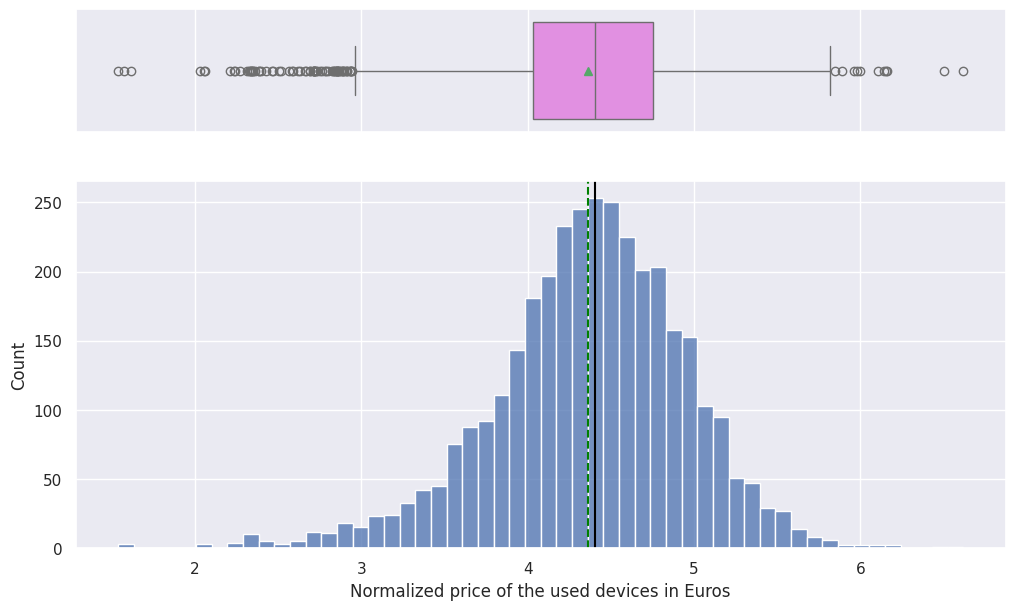

In [161]:
histogram_boxplot(data,"normalized_used_price")
plt.xlabel("Normalized price of the used devices in Euros");

Observations:
- The price of used phones approximately follows a normal distribution
- From the box_plot we can see that there are outliers

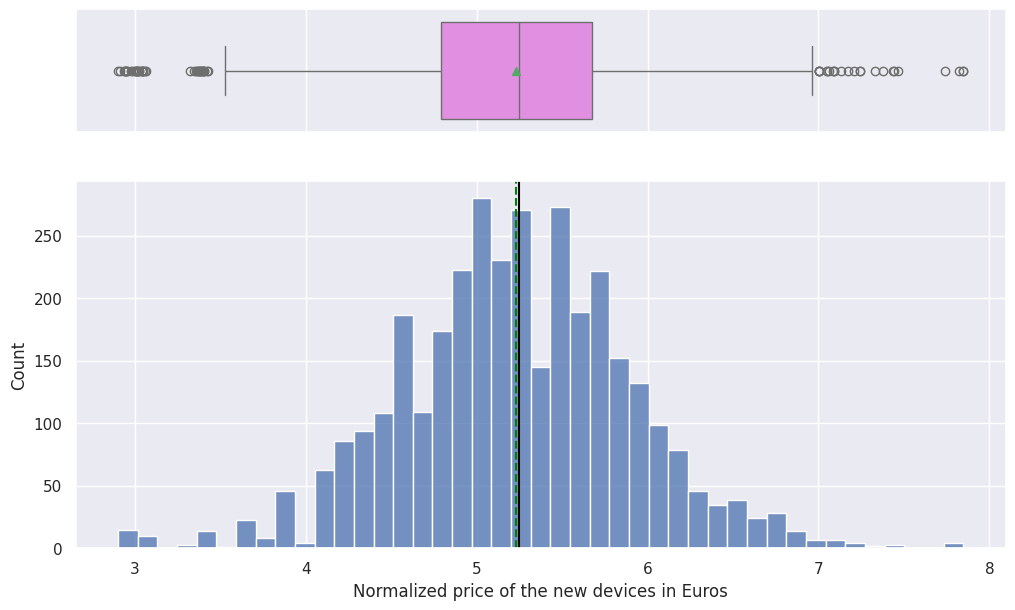

In [162]:
#new price
histogram_boxplot(data,"normalized_new_price")
plt.xlabel("Normalized price of the new devices in Euros");

Observation:
The prices of used phones are kind of normally distributed

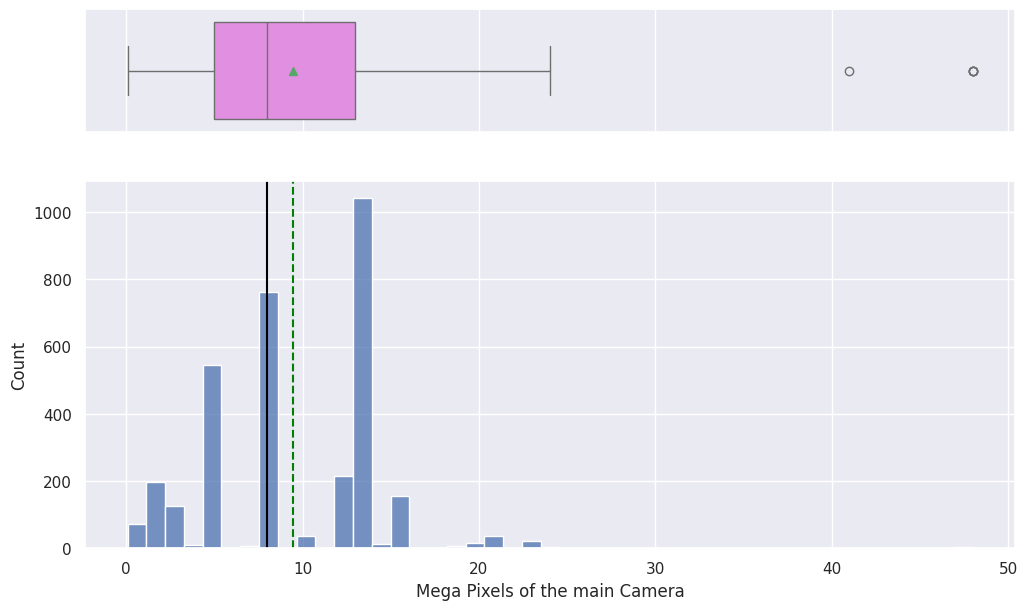

In [163]:
# Main Camera
histogram_boxplot(data,"main_camera_mp")
plt.xlabel("Mega Pixels of the main Camera");

Observations:
The main camera pixels are kind of normally distributed

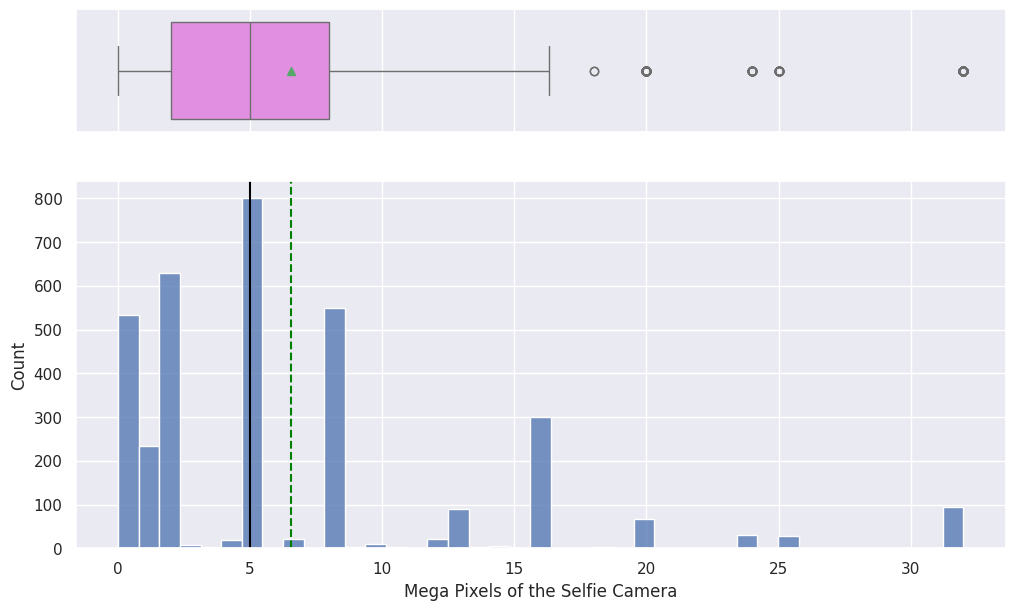

In [164]:
#selfie
histogram_boxplot(data,"selfie_camera_mp")
plt.xlabel("Mega Pixels of the Selfie Camera");

Observations:
The distribution of selfie camera pixels of the devices is right skewed

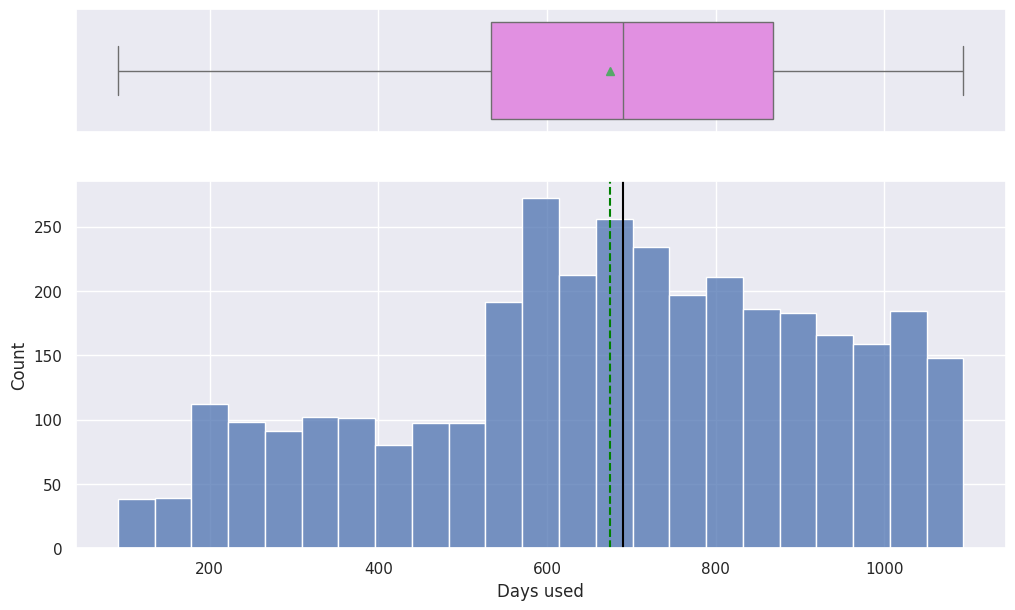

In [165]:
#Days used
histogram_boxplot(data,"days_used")
plt.xlabel("Days used");

Observations:
The days used are approximately normally distributed

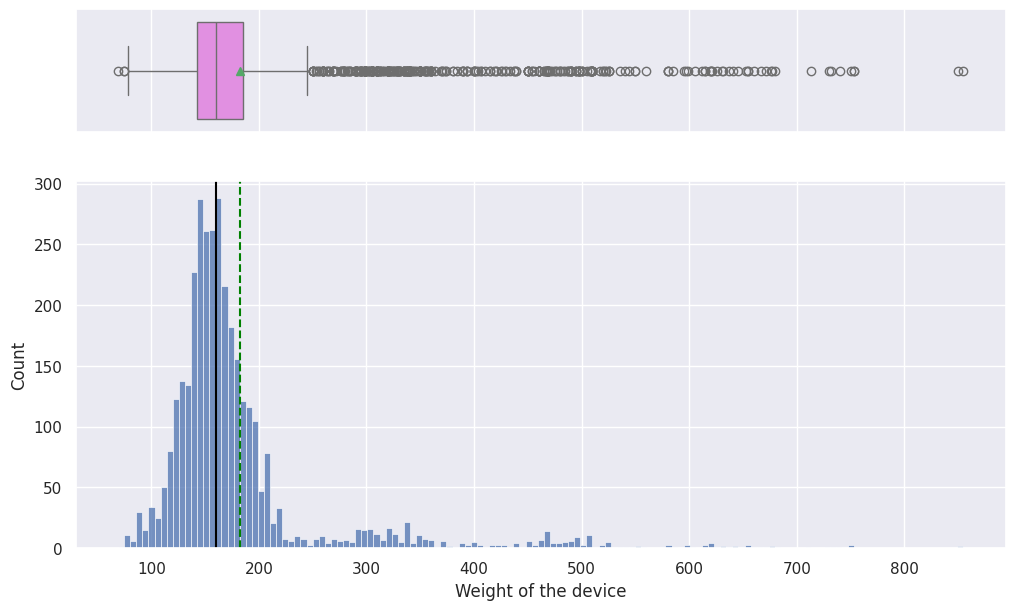

In [166]:
#weight
histogram_boxplot(data,"weight")
plt.xlabel("Weight of the device");


Observations:
- The weight column heavily right skewed.
- During data preporocessing for model building, I will perform a log transformation on this column to reduce the skewness

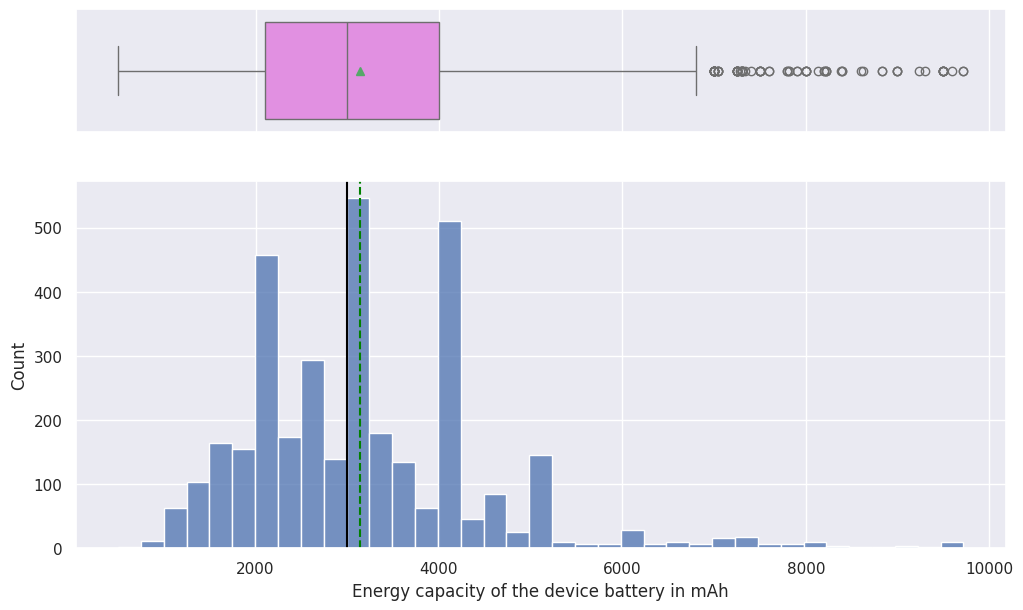

In [167]:
#Battery
histogram_boxplot(data,"battery")
plt.xlabel("Energy capacity of the device battery in mAh");

Observations:
There is right-skewness in the battery column

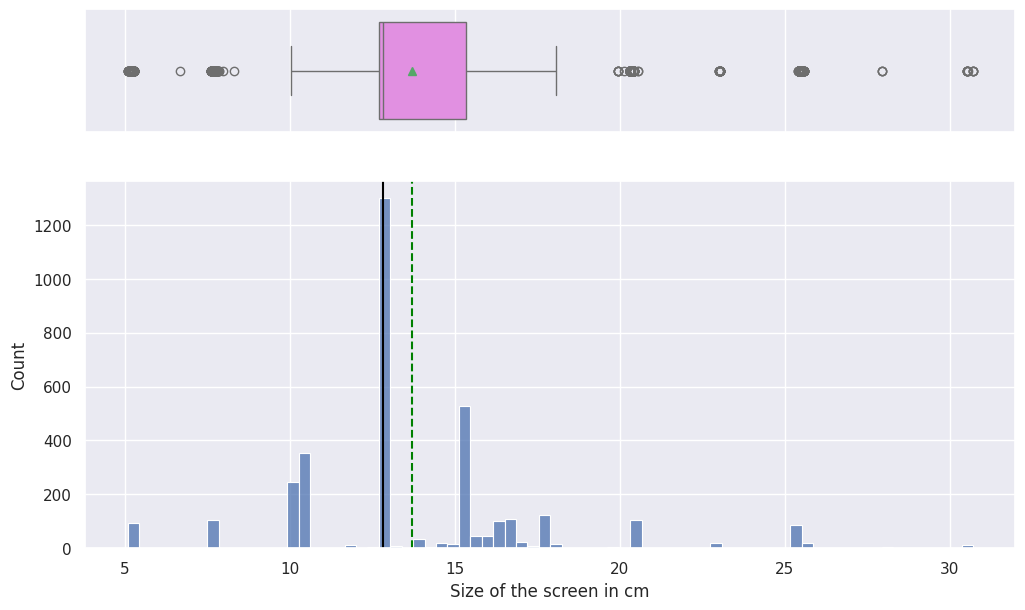

In [168]:
#screensize
histogram_boxplot(data,"screen_size")
plt.xlabel("Size of the screen in cm");

Observations:
The distribution of screen size of the devices is approximately normal

In [169]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


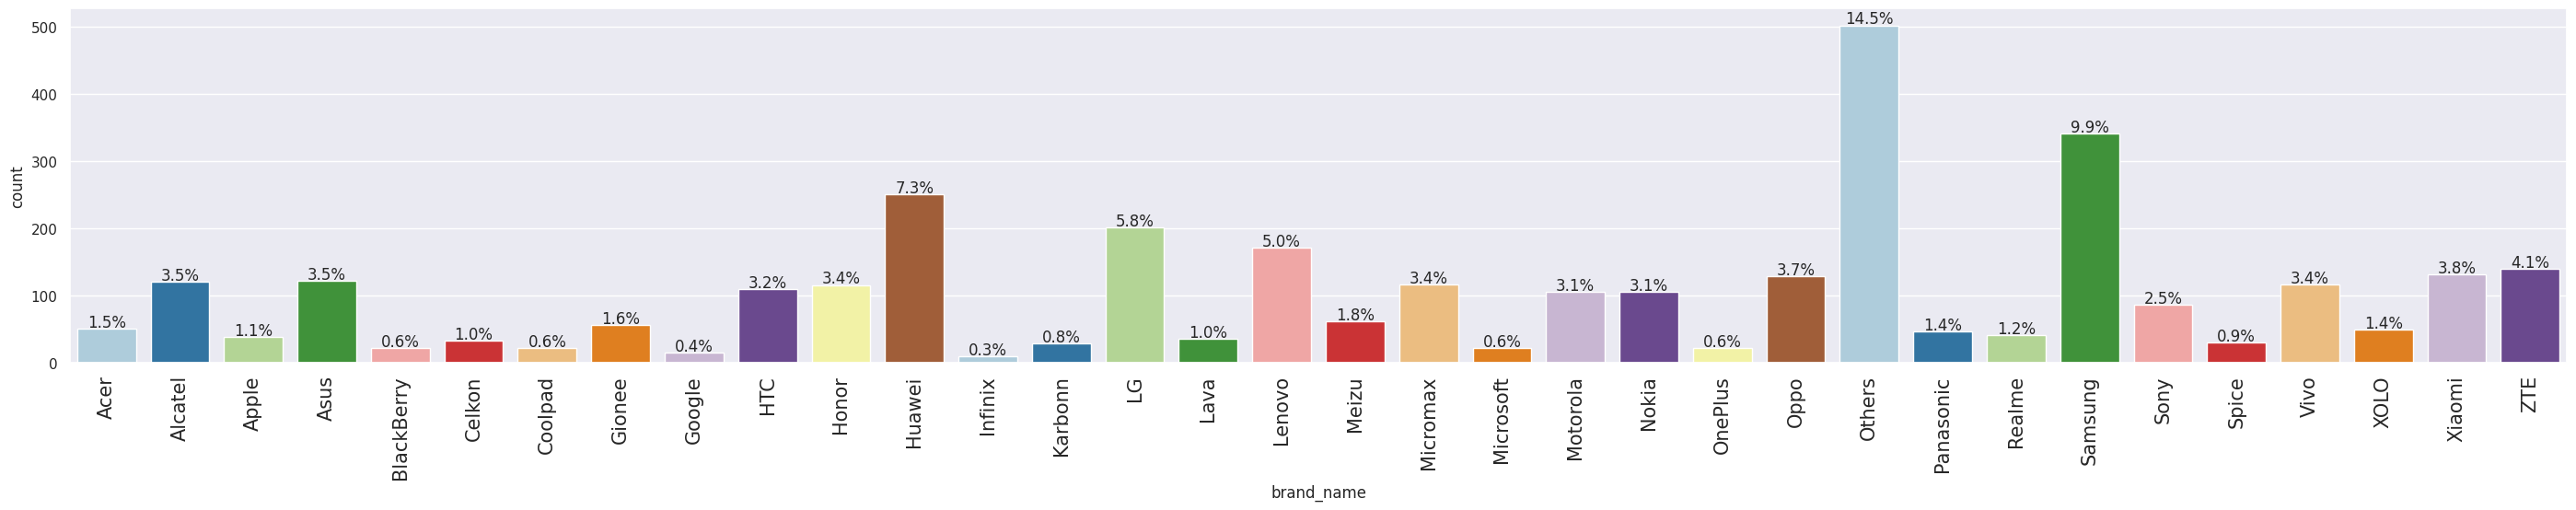

In [170]:
labeled_barplot(data, "brand_name", perc=True,)


Observations:
- Most of the brand names were not given and they fall under the category of others
- Samsung have a higher percentage compared to others. This means customers mostly buy refurbished samsung phones.

2. What percentage of the used device market is dominated by Android devices?

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


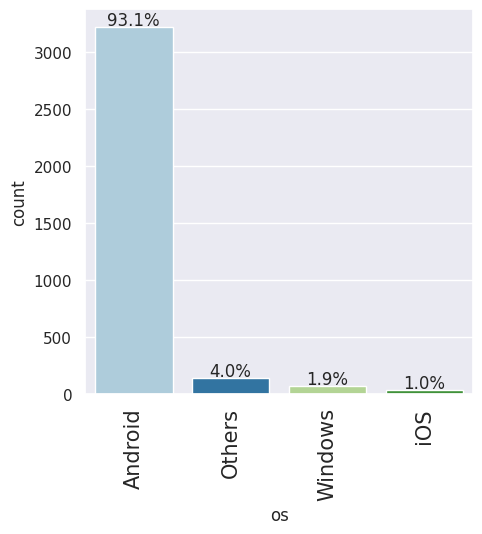

In [171]:
#OS
labeled_barplot(data, "os", perc=True,)

Observation:
- Android devices are the most refurbished ones with a percentage of 93.1 in the Refurbished market


<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


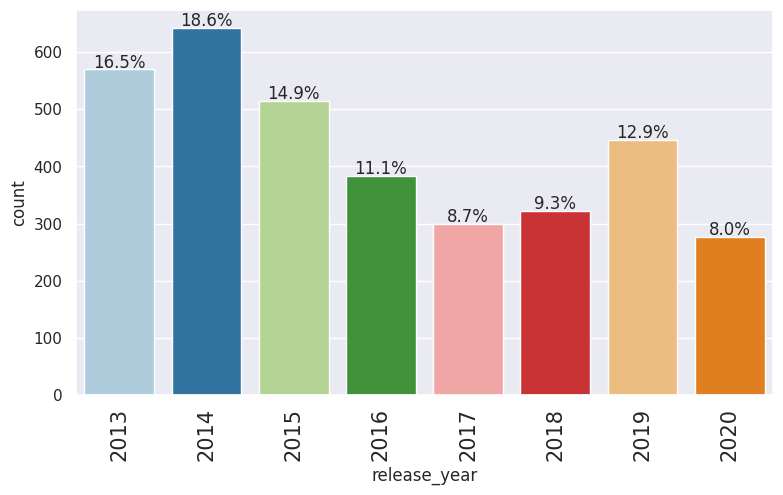

In [172]:
#Release Year
labeled_barplot(data, "release_year", perc=True,)

Observations:
Devices released in 2014 were the most refurbished ones

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


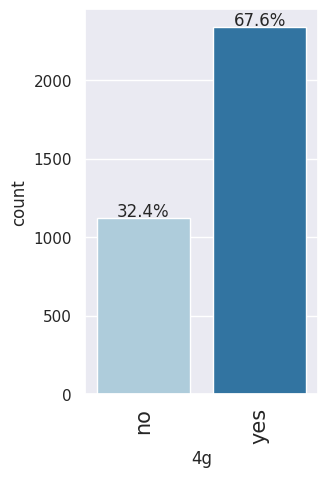

In [173]:
#4G and 5G
labeled_barplot(data, "4g", perc=True,)

REVIEWED AND OBSERVED DATA:
<br>
**Review:**

**Central Tendency:** The green dashed line (mean) and the black solid line (median) depict the central tendency of the distribution.

**Spread:** The width of the box in the boxplot represents the interquartile range (IQR), indicating how dispersed the middle 50% of the data is.

**Outliers:** Data points significantly outside the main distribution suggest prices that are much higher or lower compared to the majority.

**Distribution Shape:** The histogram, with the KDE curve, illustrates the distribution's shape. A bell-shaped distribution approximates normality, while other shapes may indicate skewness or multiple peaks.

**Observations:**

**screen_size:**
- Concentration around 14-15 cm suggests a common standard.
- Right skew suggests non-linearity, possibly requiring transformation for linear modeling.

**main_camera_mp:**
- High concentration in lower megapixels, fewer high-megapixel devices.
- Consider binning or transformation for linear models due to right skew.

**selfie_camera_mp:**
- Lower-end specs are more prevalent, with occasional high-end specs.
- Outliers may need attention for linear regression's normality assumption.

**int_memory:**
- Devices with higher memory are less frequent.
- Non-linear transformation or categorization could aid in modeling.

**ram:**
- Concentrated around a single value (typically 4GB).
- Low variance in RAM may not strongly impact linear model predictions.

**battery:**
- Right-skewed distribution with some high-capacity outliers.
- Transformation or outlier treatment might ensure homoscedasticity in residuals.

**weight:**
- Most devices are lighter; right skew indicates some heavier models like tablets.
- Skewness suggests potential need for data transformation for linearity.

**release_year:**
- Consistent release frequency over time without significant outliers.
- Temporal data management is crucial to avoid multicollinearity.

**days_used:**
- Symmetrical distribution around the median.
- Normal distribution suggests no transformation needed for linear regression.

**normalized_used_price:**
- Fairly symmetrical, bell-shaped distribution.
- Normal distribution supports linear regression assumptions.

**normalized_new_price:**
- Presence of outliers indicates price variation for new devices.
- Outlier management may be essential to prevent undue influence on regression models.

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


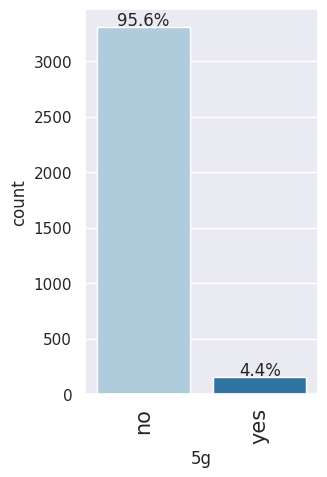

In [174]:
labeled_barplot(data, "5g", perc=True,)

Observations:
More 4G devices were refurbished as compared to 5G

Correlation heatmap

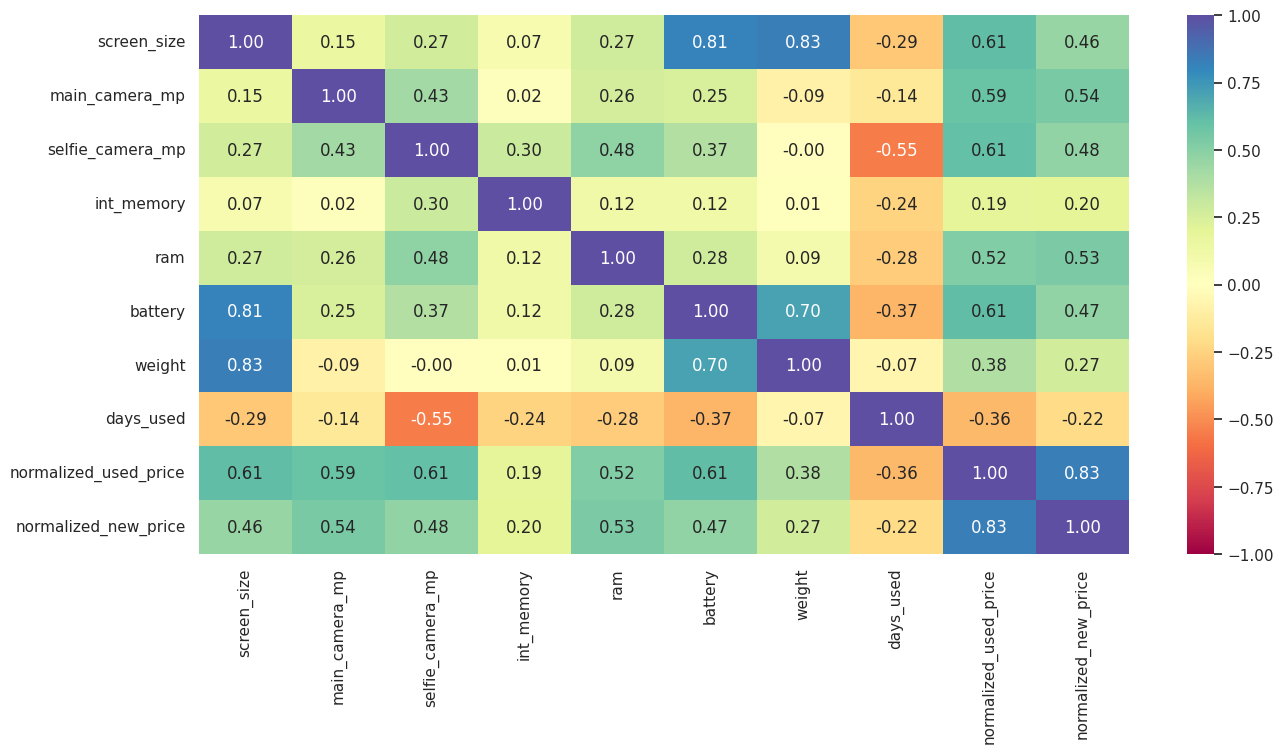

In [175]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping the release_year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);

**Observations:**

- **Strong Positive Correlations:**
  - Battery and weight are strongly positively correlated at 0.70.
  - Both battery (0.81) and weight (0.83) demonstrate almost equal strong positive correlations with screen_size.
  - Screen_size, battery, and selfie_camera_mp exhibit identical positive correlations with the target variable (0.61).
  - Weight (0.38) shows a weaker direct correlation with the target. The strong correlations of battery and screen_size with the target suggest considering them for model inclusion. However, weight's lower correlation may indicate reduced predictive utility and potential multicollinearity with battery due to shared information.

- **Normalized Price Correlations:**
  - There exists a strong positive correlation between normalized_used_price and normalized_new_price, indicating that the original device price strongly predicts its second-hand price.

- **Correlations with Target Variable:**
  - The target variable shows notable positive correlations with main_camera_mp, release_year, and ram, suggesting these features are robust predictors of the used device price.

- **Release Year and Usage Days:**
  - Release_year negatively correlates strongly with days_used, which aligns logically with newer devices having fewer usage days.
  - Days_used negatively correlates with normalized_used_price and normalized_new_price, indicating that as device usage duration increases, both its used and new prices tend to decrease.

**Multicollinearity Management Strategy:**

- Conduct Variance Inflation Factor (VIF) analysis to evaluate the extent of multicollinearity among independent variables before making decisions about their inclusion or modification.
- Consider employing dimensionality reduction techniques such as Principal Component Analysis (PCA), or regularization methods like Ridge (L2) or Lasso (L1), to address multicollinearity effectively and improve model interpretability and performance.

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

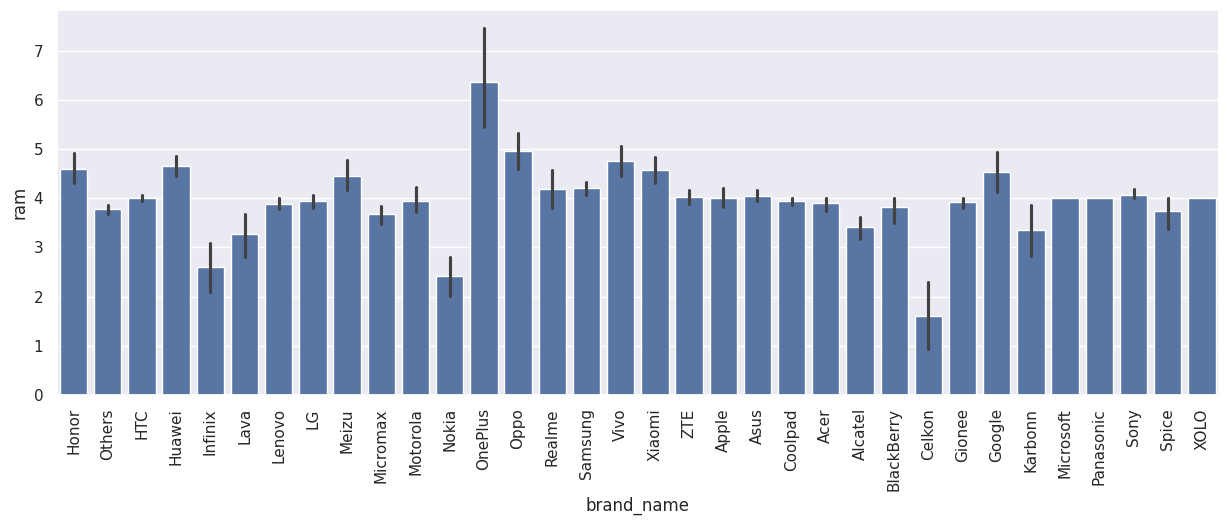

In [176]:
# brand name vs ram
plt.figure(figsize=(15, 5))
sns.barplot(x="brand_name", y="ram", data=data)
plt.xticks(rotation=90);

bservation:
OnePlus brand gives more RAM to the devices

OS vs RAM

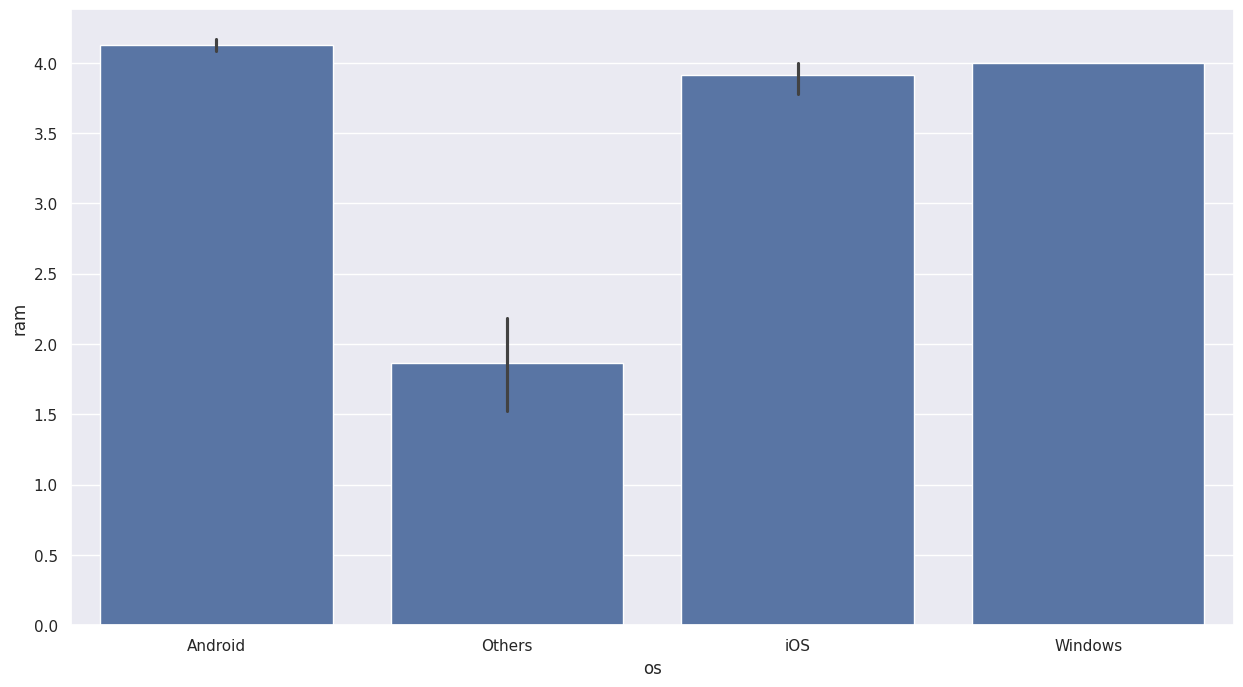

In [177]:
sns.barplot(x="os", y="ram", data=data);

Observations:
Android offers the most RAM

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [178]:
data_large_battery = data[data.battery > 4500]
data_large_battery.shape

(341, 15)

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


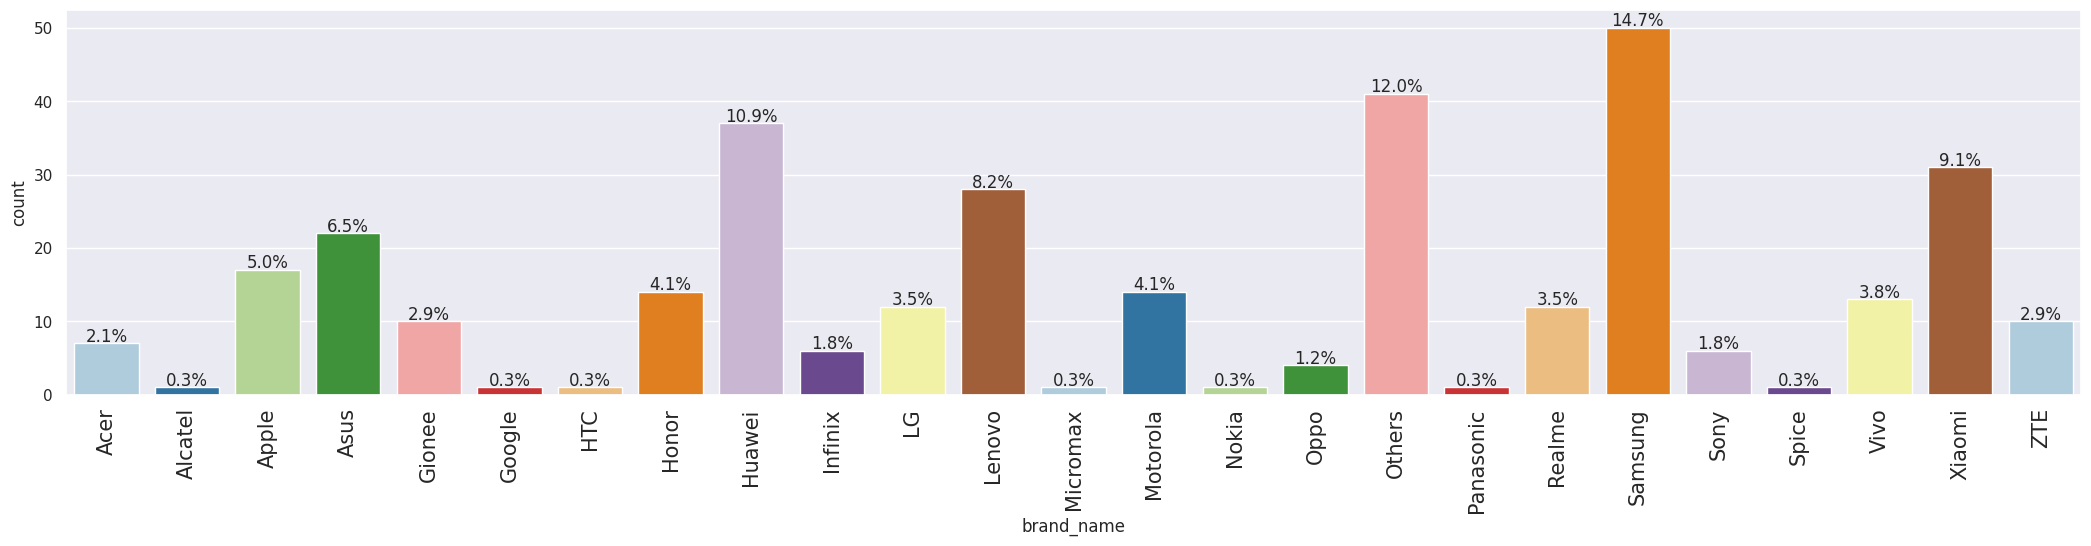

In [179]:
labeled_barplot(data_large_battery, 'brand_name', perc=True)

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


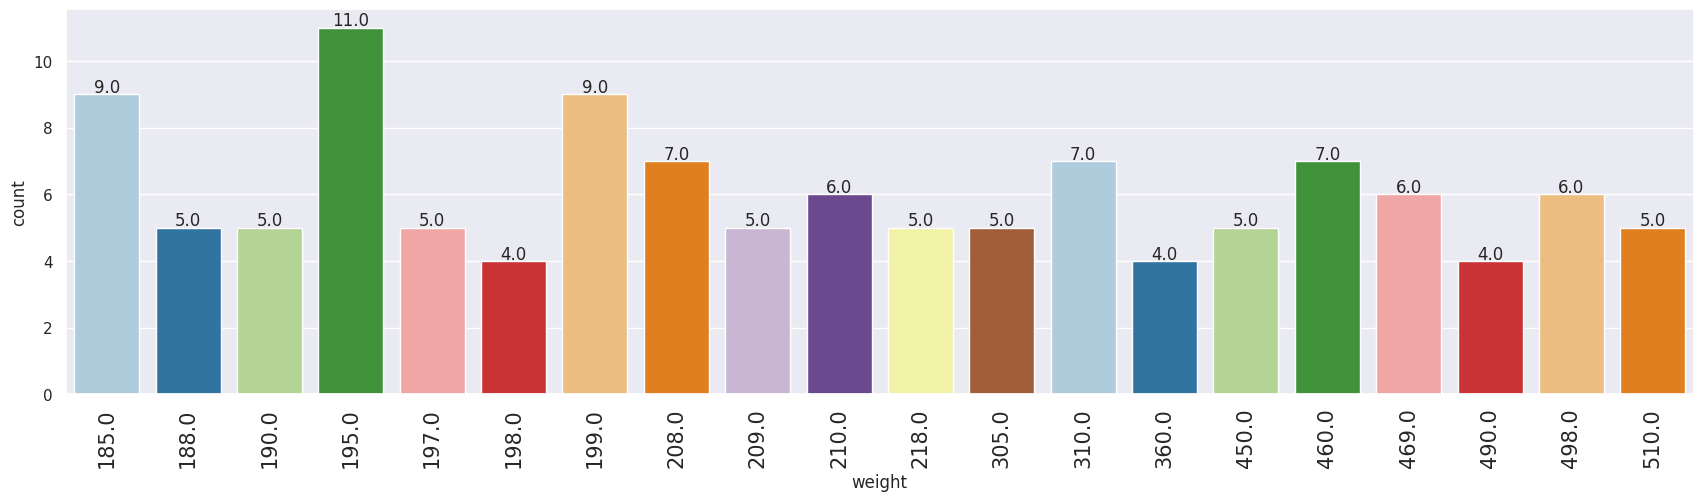

In [180]:
labeled_barplot(data_large_battery, 'weight', n=20)

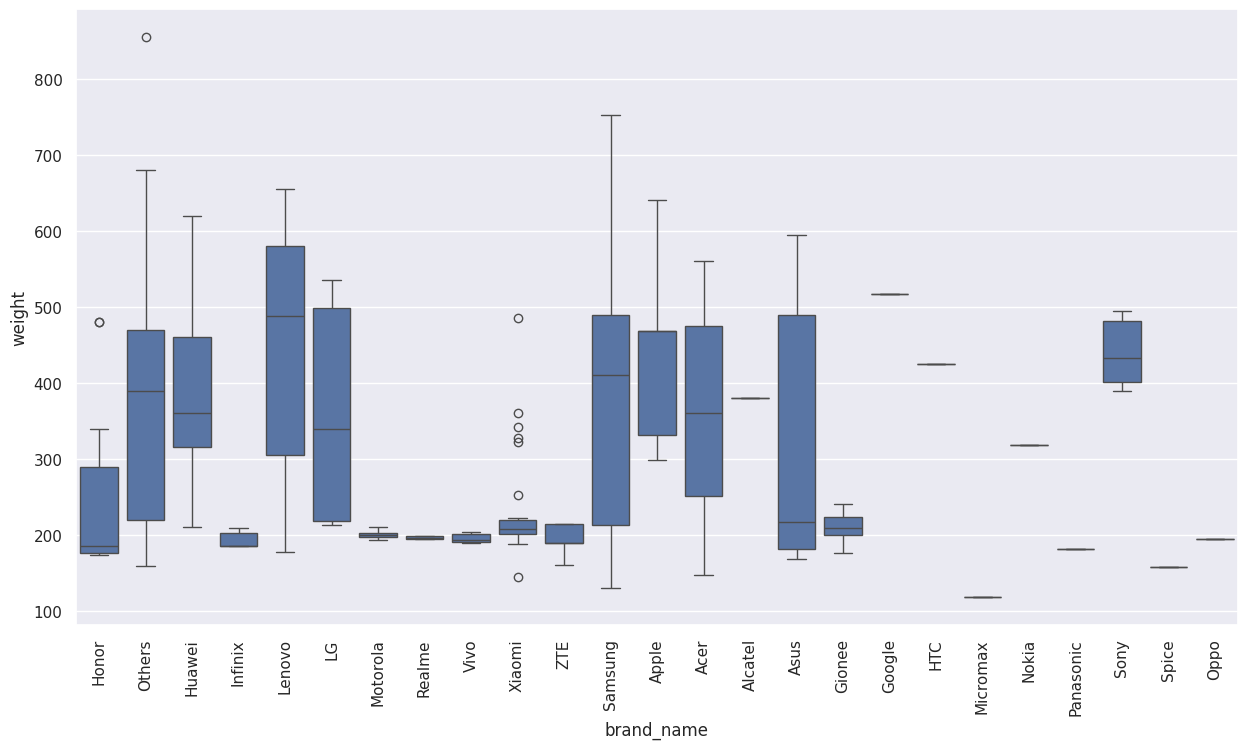

In [181]:
sns.boxplot(x="brand_name", y ="weight", data=data_large_battery)
plt.xticks(rotation=90);

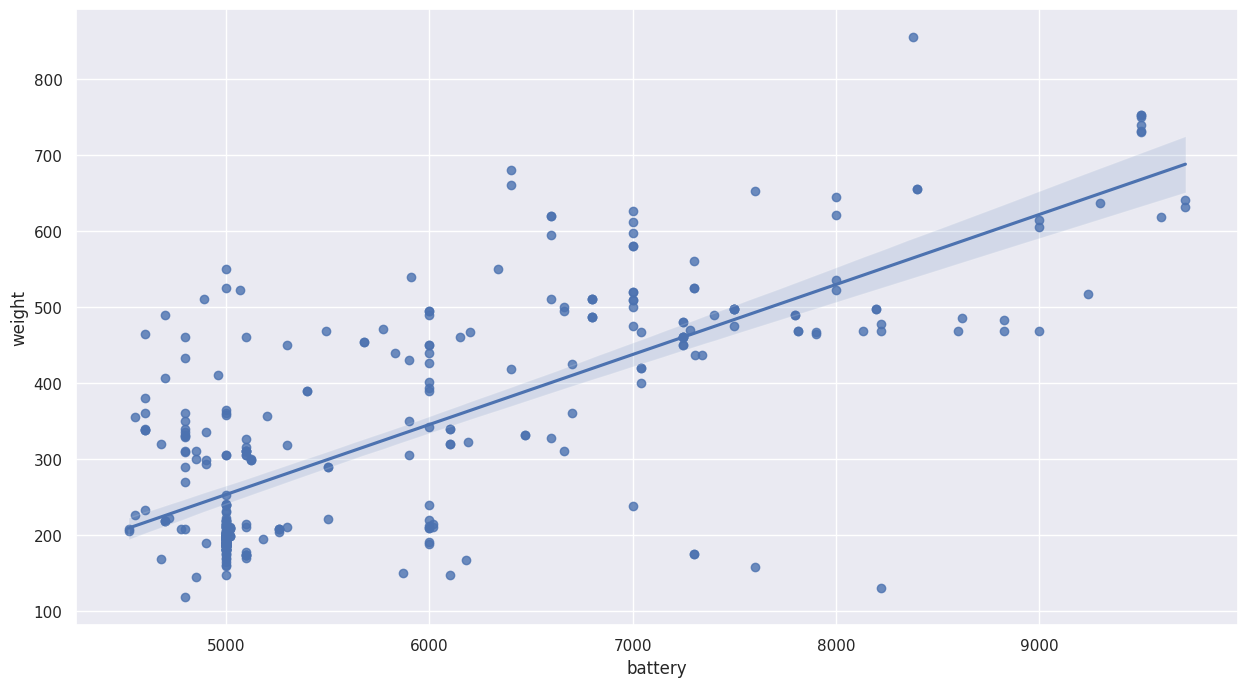

In [182]:
sns.regplot(x="battery", y ="weight", data=data_large_battery);

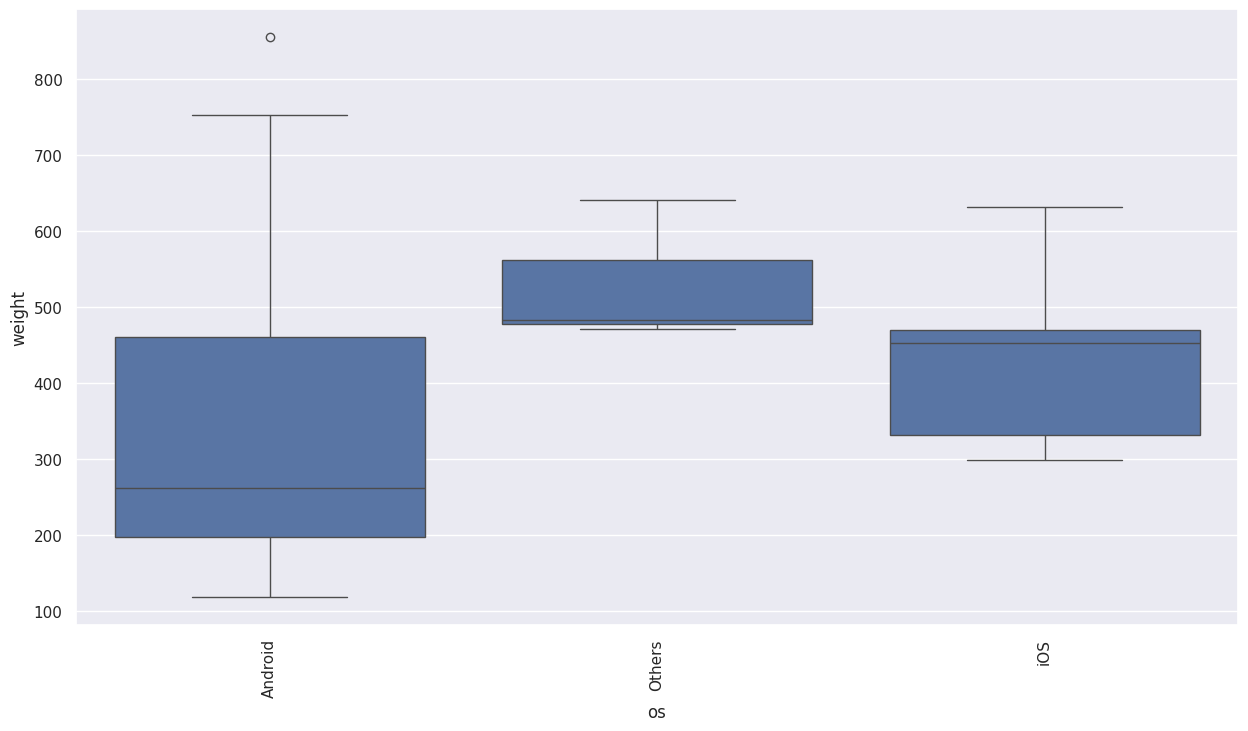

In [183]:
# weight vs os
sns.boxplot(x="os", y ="weight", data=data_large_battery)
plt.xticks(rotation=90);

Observations:
- The Samsung brand gives most of its devices large batteries of more than 4500 mAh. This means samsung phones are heavier as compared to other brands.
- Phones with large batteries of more than 4500 mAh most fall under the Android OS category. This means that Android phones are generally more heavier.
- As battery capacity increases weight increase

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [184]:
df_main_camera_pixels = data[data["main_camera_mp"] > 13 ]
df_main_camera_pixels.shape

(267, 15)

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


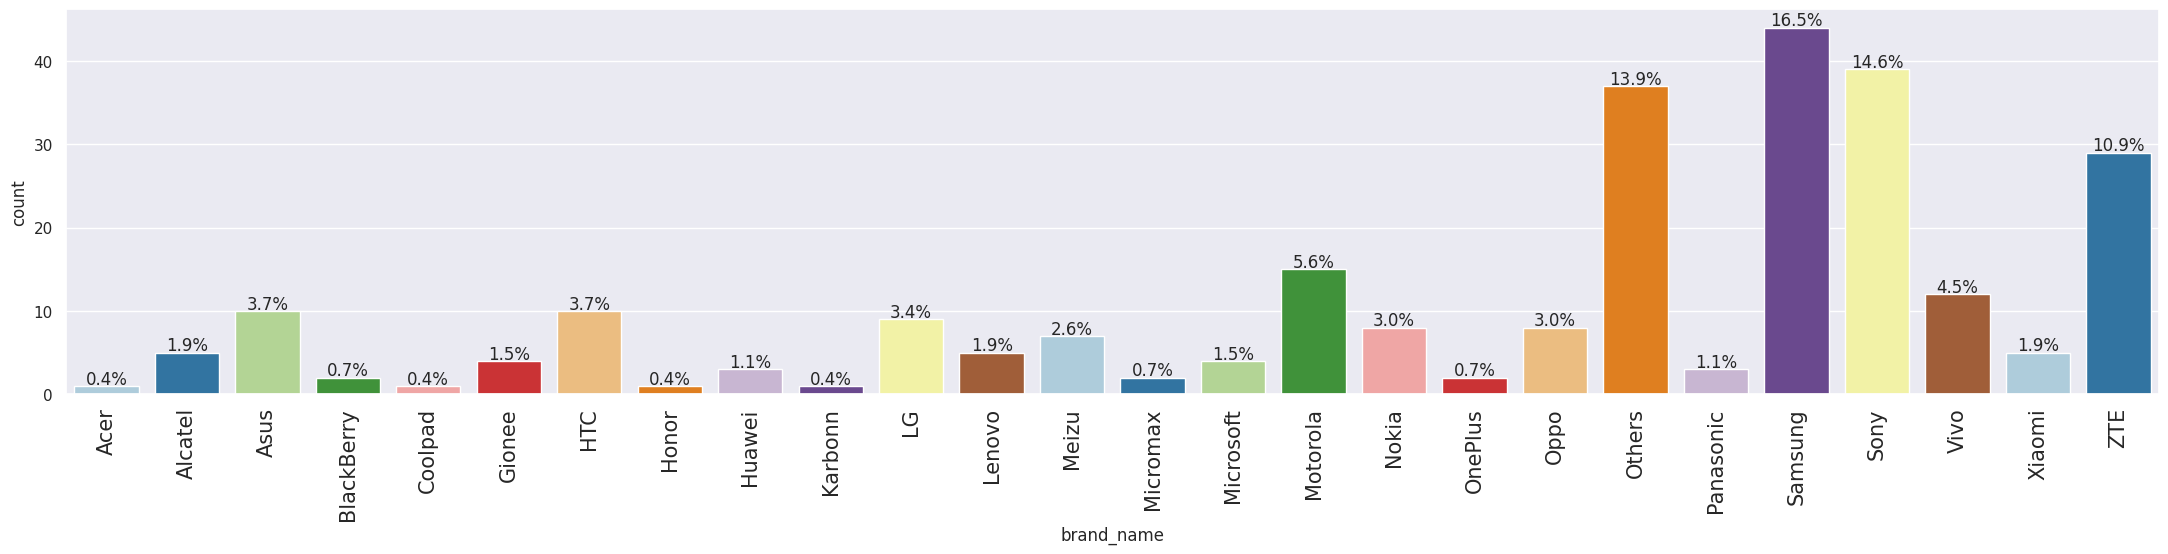

In [185]:
labeled_barplot(df_main_camera_pixels, "brand_name", perc=True);

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


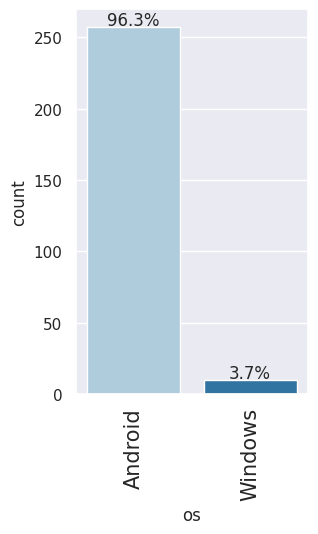

In [186]:
labeled_barplot(df_main_camera_pixels, "os", perc=True);

Observations:
- Samsung devices have the biggest count when it comes to main camera pixels greater than 13
- Android has the biggest percentage of devices with main camera mega pixels greater than 13

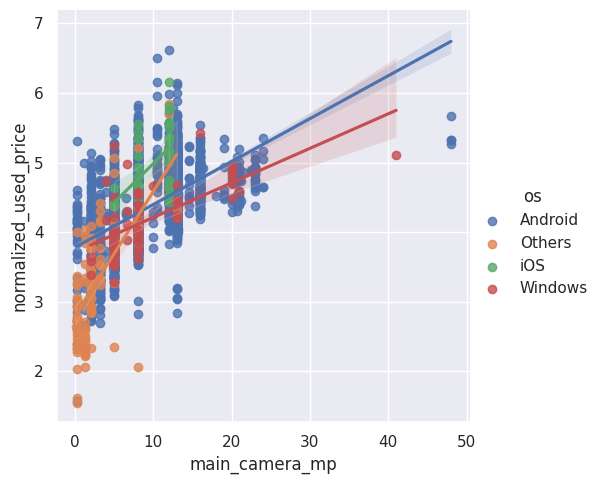

In [187]:
sns.lmplot(x = 'main_camera_mp', y = 'normalized_used_price', data = data, hue = 'os');

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MPselfie cameras across brands?

In [188]:
df_selfie_camera_pixels = data[data["selfie_camera_mp"] > 8]
df_selfie_camera_pixels.shape

(655, 15)

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


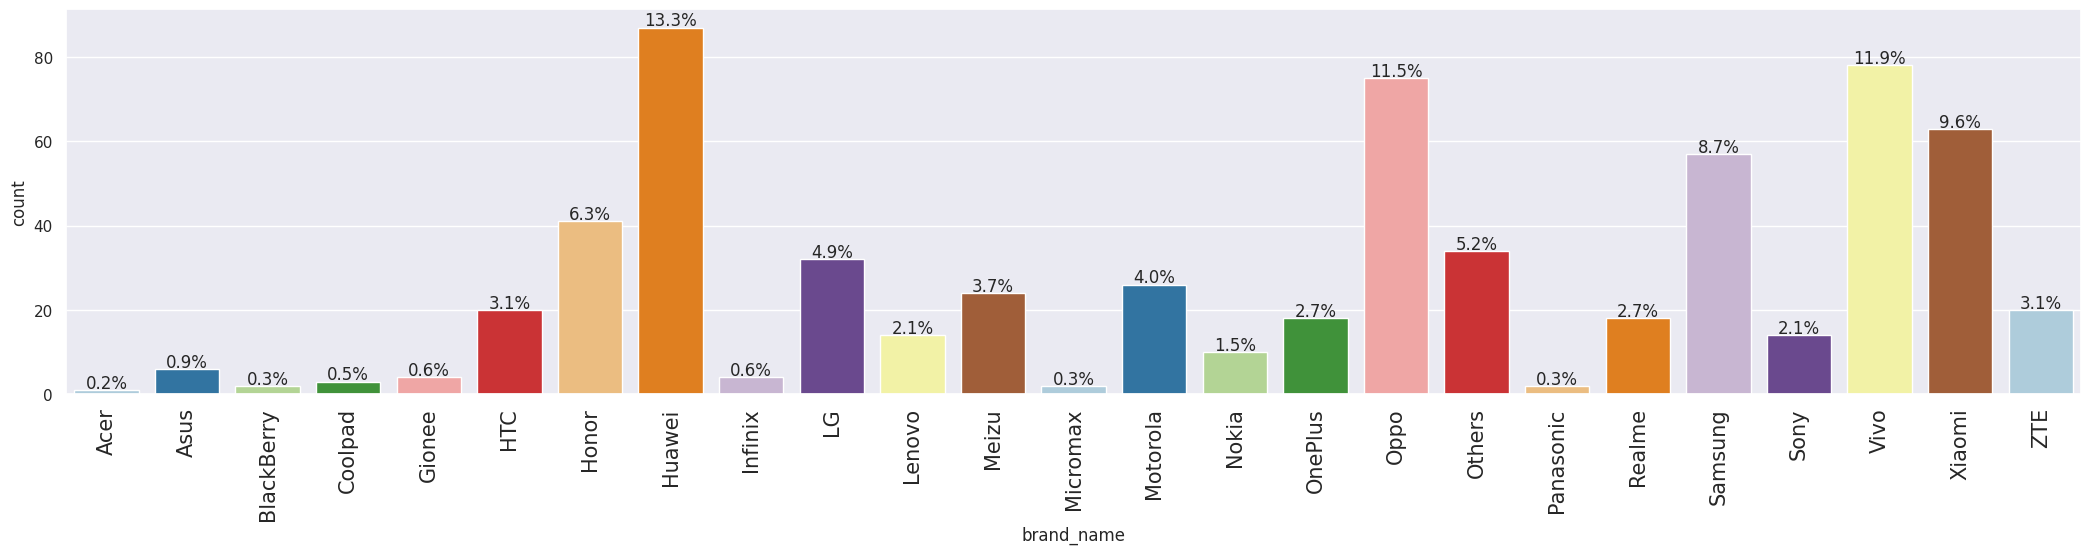

In [189]:
# selfie_camera_mp vs brand_name
labeled_barplot(df_selfie_camera_pixels, "brand_name", perc=True);

<ipython-input-169-1dc20bb483dd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


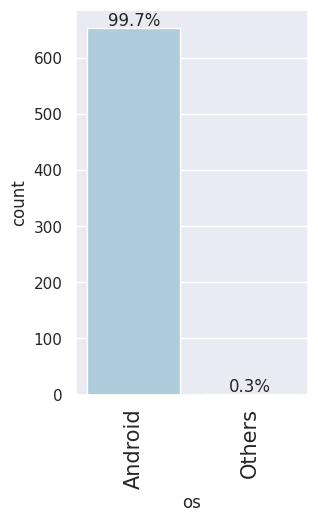

In [190]:
# selfie_camera_mp vs os
labeled_barplot(df_selfie_camera_pixels, "os", perc=True);

In [191]:
df_selfie_camera_pixels["os"].value_counts()

os
Android    653
Others       2
Name: count, dtype: int64

Observations:
- Android offers the greatest number of devices with selfie camera mega pixels greter than 8. This could probably be one of the reasons they have the biggest number in the market of refurbished devices
- Huawei devices are the ones with the greatest count with selfie camera mega pixels greater than 8
- iOS devices don't offer selfie camera mega pixels greater than 8

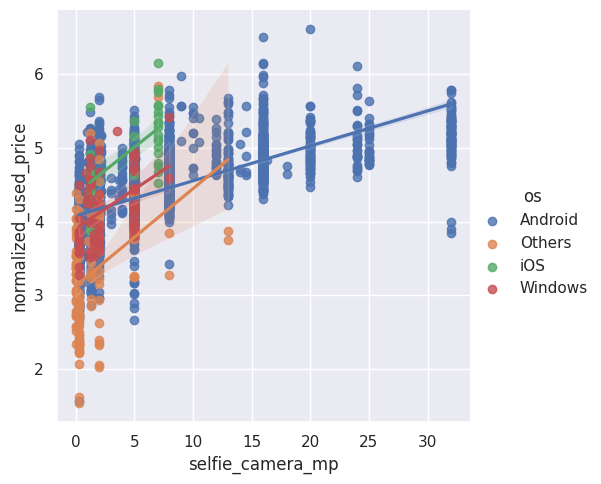

In [192]:
sns.lmplot(x = 'selfie_camera_mp', y = 'normalized_used_price', data = data, hue = 'os');

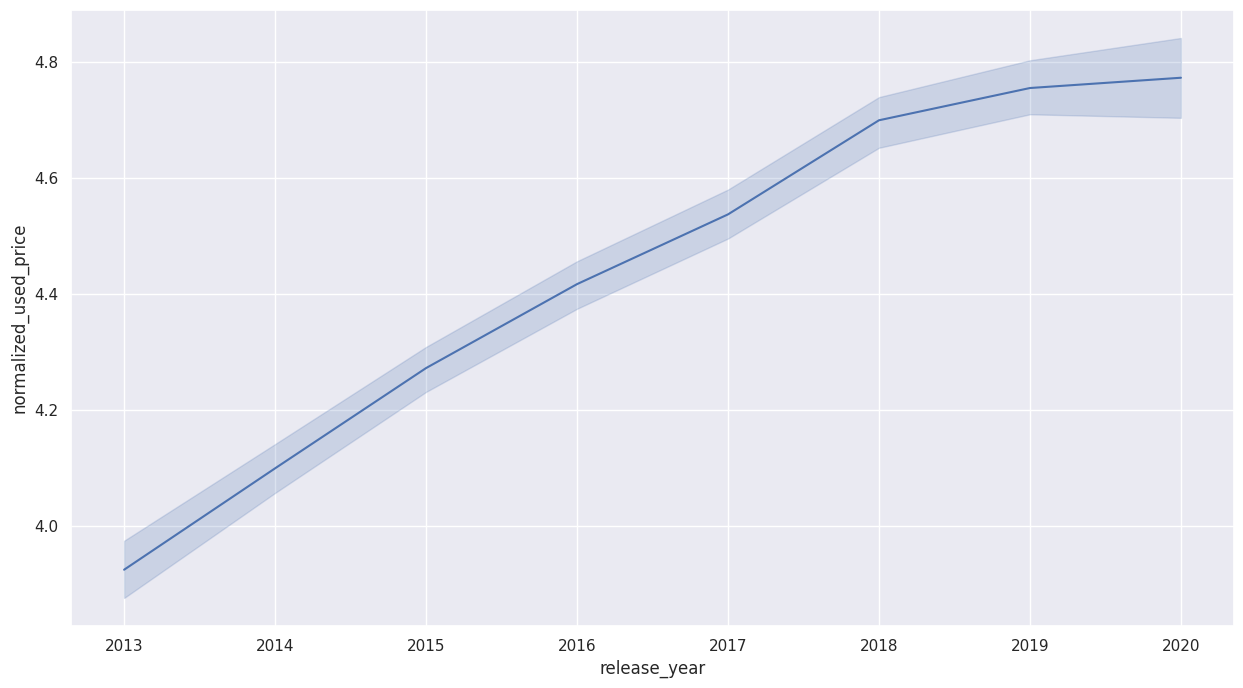

In [193]:
sns.lineplot(x="release_year", y="normalized_used_price", data=data);

Observations:
- The price of refurbished phones keeps increasing over years. The newer the release year the higher the price

7. Which attributes are highly correlated with the normalized price of a used device?

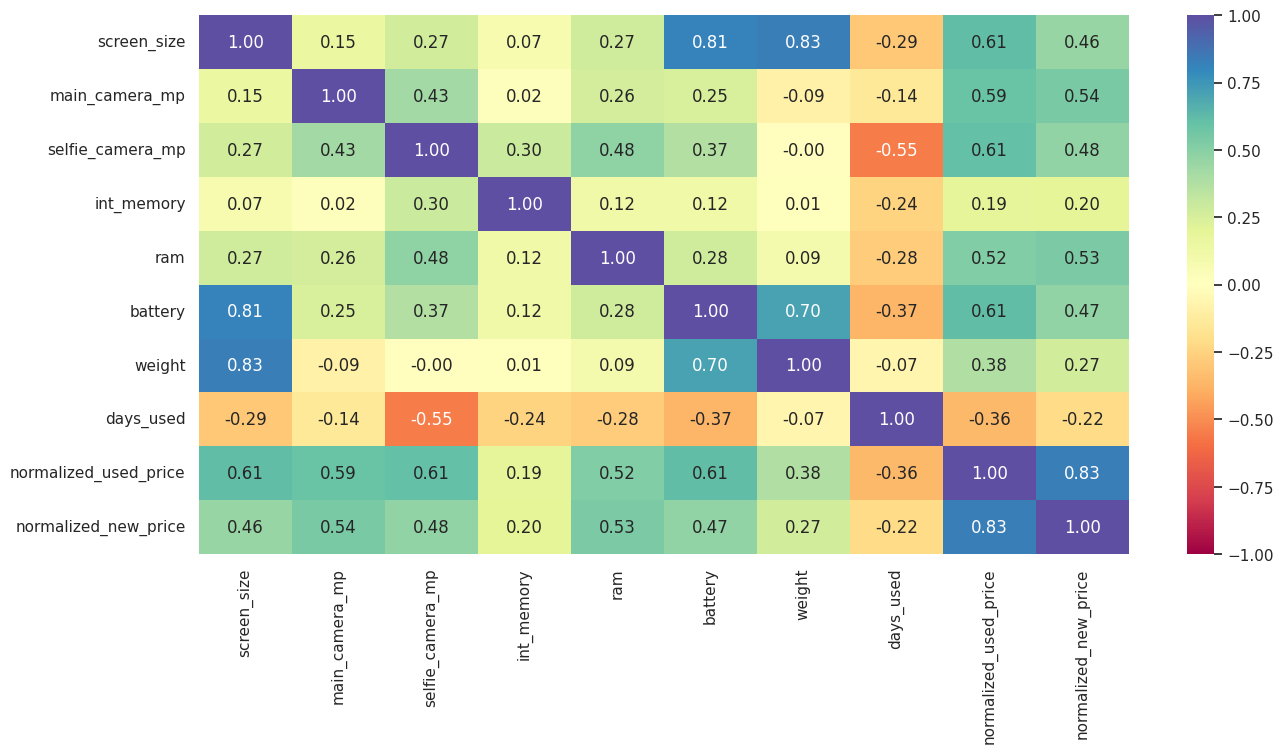

In [194]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
 )
plt.show()

Observations:
- The normalized used device price is highly correlated with the normalized price of a new device model. This makes sense as the price of a new model is likely to affect the used device price.
- The normalized used price of a device has an 0.83 correlation factor with the normalized price of a used device. The normalized used device price is also moderately correlated with the resolution of the cameras provided, the size of the screen, and the battery capacity.
- Weight, screen size, and battery capacity of a device show a good amount of correlation. This makes sense as larger battery capacity requires bigger space, thereby increasing screen size and weight. The number of days a device is used is negatively correlated with the resolution of its front camera.
-This makes sense as older devices did not offer as powerful front cameras as the recent ones.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [195]:
# creating a copy of the data frame
df1 = data.copy()

In [196]:
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [197]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight", ]
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
        )
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations: int_memory and ram have been treated by imputing the median value for missing values

In [198]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight", ]
for col in cols_impute:
  df1[col] = df1[col].fillna(
      value=df1.groupby(['brand_name'])[col].transform("median")
      )
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Observation
- main_camera_mp still has 10 missing values
- Will input these missing values with the median of the column(main_camera_mp)

In [199]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [200]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

There are no no more missing values

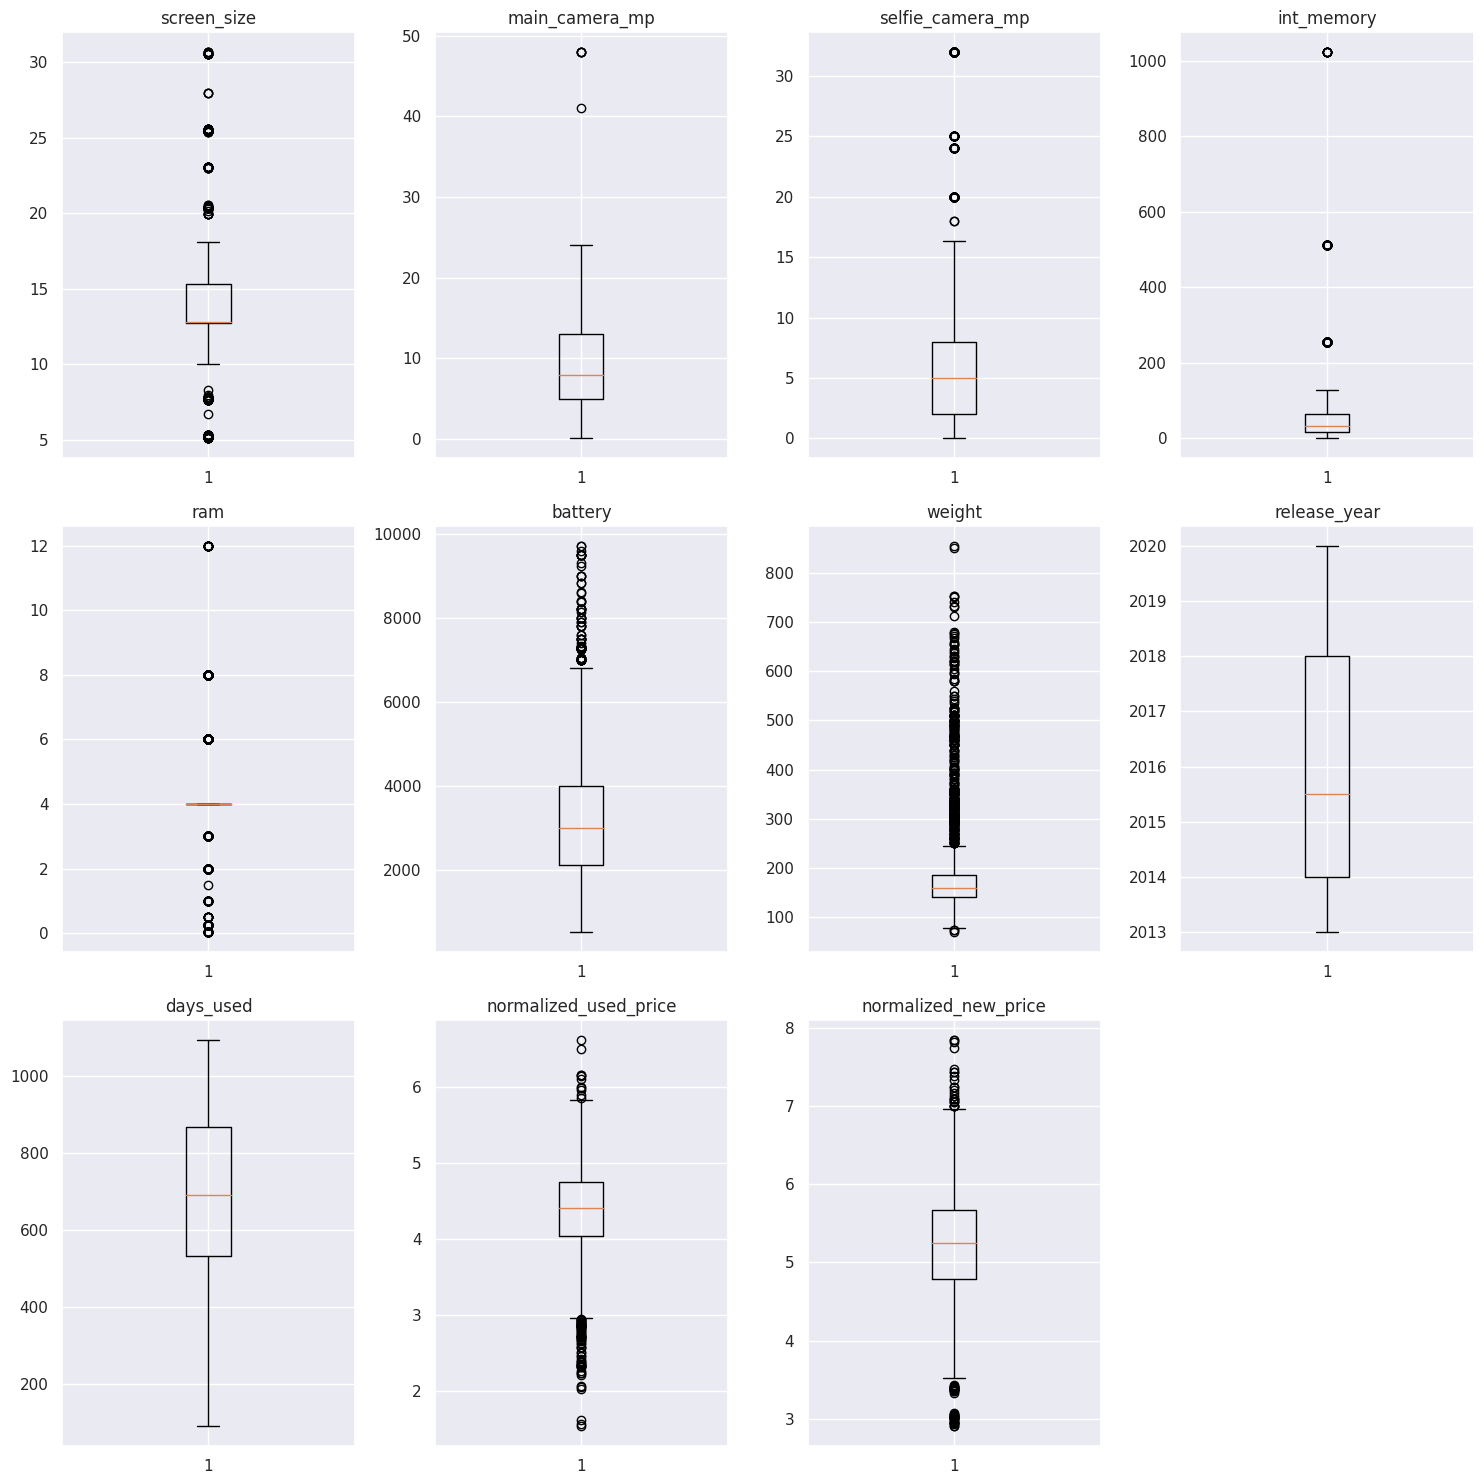

In [201]:
#Outlier check
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


In [202]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [203]:
# list of columns to treat for outliers
treat_out_cols = ["weight", "normalized_new_price", "battery",
                  "int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size"]

In [204]:
df2 = treat_outliers_all(df1, treat_out_cols)

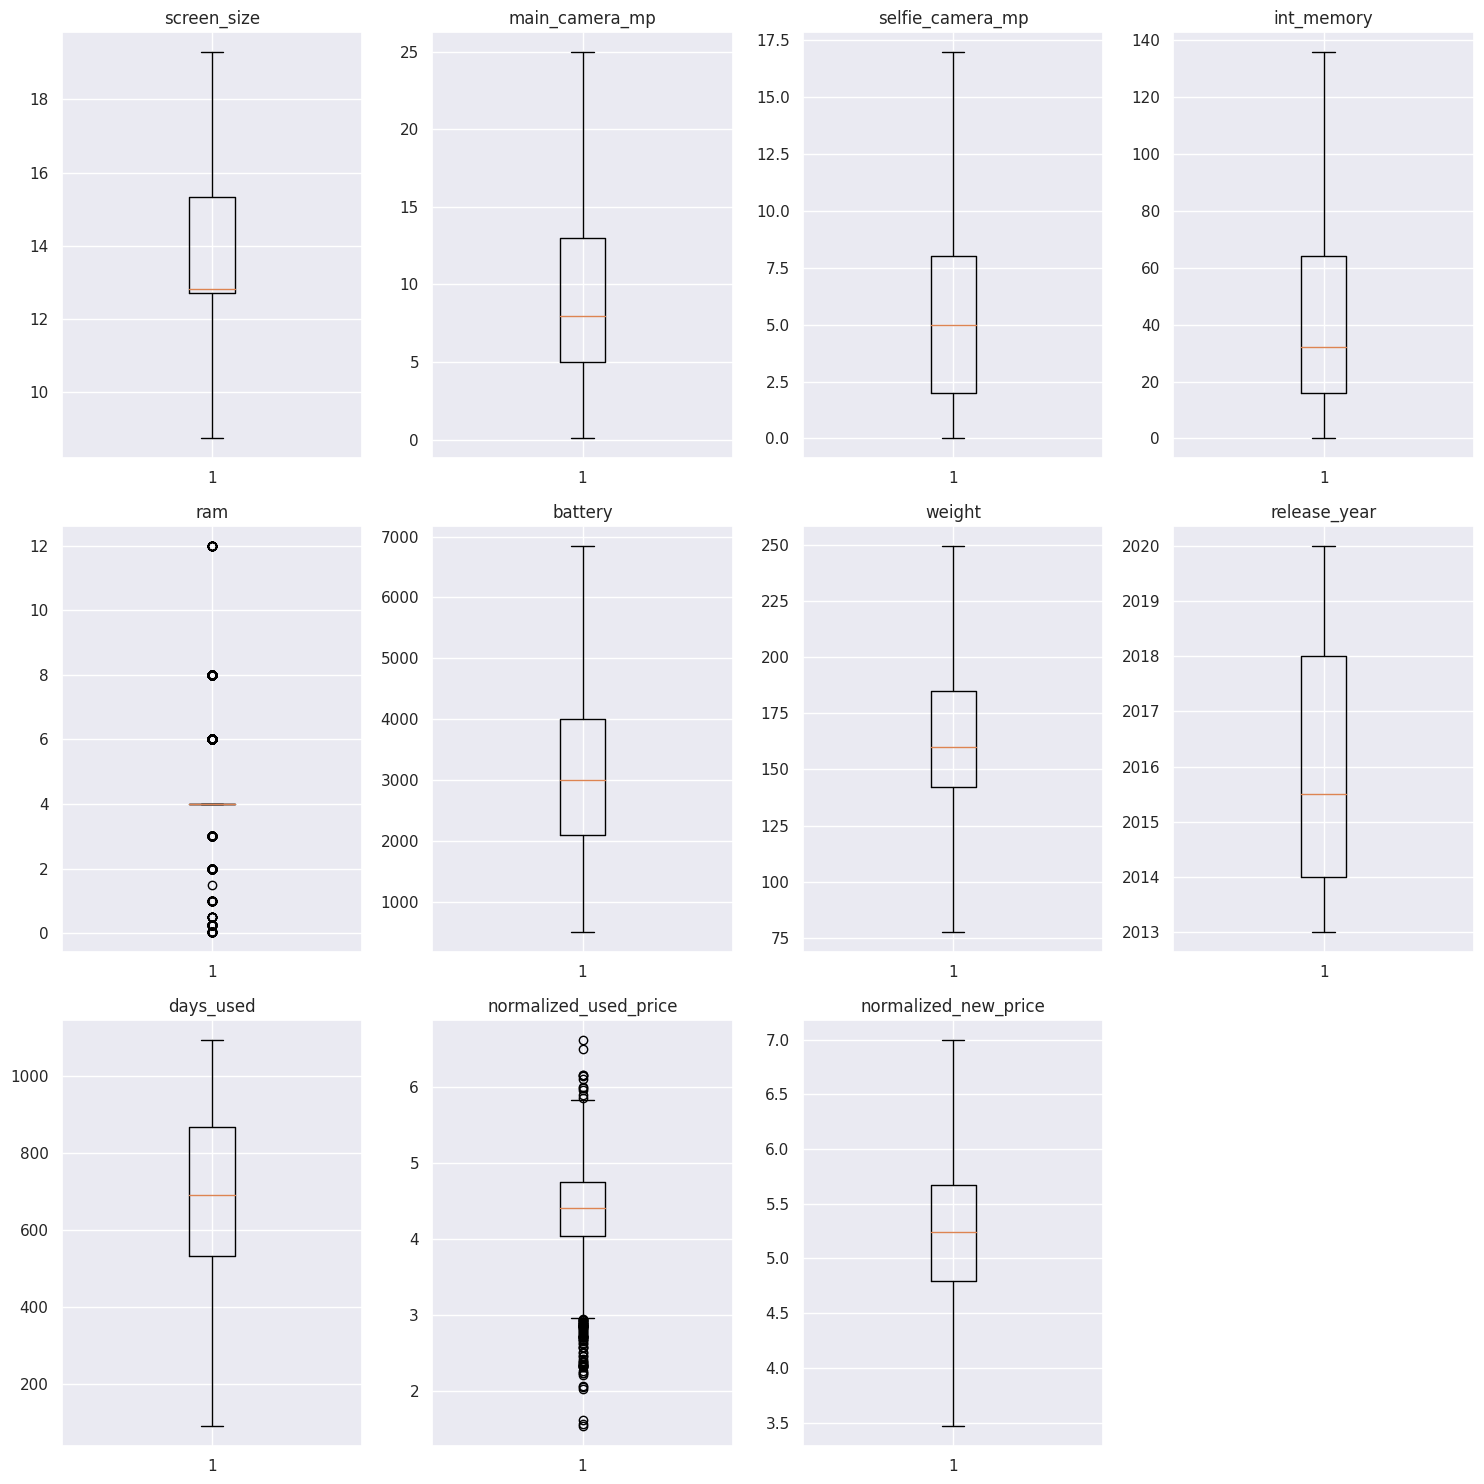

In [205]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

All outliers in the independent columns were treated apart from the ram column

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [206]:
# check the statistical summary once again
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


In [207]:
# check df2 has no missing values as required
df2.isnull().sum().sum()

0

In [208]:
# take a look at how df2 data looks like now
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,249.5,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [209]:
df2["brand_name"].nunique()

34

In [210]:
df2.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column
df2.head()


,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,249.5,2020,345,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [211]:
df2.dtypes

os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

In [212]:
# define dependent and independent variables
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  release_year  days_used  \
0        64.0  3.0   3020.0   146.0          2020        127   
1       128.0  8.0   4300.0   213.0          2020        325   
2       128.0  8.0   4200.0   213.0          2020        162   
3        64.0  6.0   6850.0   249.5          2020        345   
4        64.0  3.0   5000.0   185.0          2020        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  

0    4.307572
1    5.162097
2  

In [213]:
X = sm.add_constant(X)

In [214]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.715100,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.519018,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.884631,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,249.5,2020.0,345.0,5.630961,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.947837,0.0,0.0,0.0,1.0,0.0


In [215]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [216]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [217]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     810.5
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:46:54   Log-Likelihood:                 49.790
No. Observations:                   2417   AIC:                            -67.58
Df Residuals:                       2401   BIC:                             25.07
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observation:
<BR>
Adjusted R-Squared is equal 0.834, which is good
The y-intercept is equal to the value of the const coeffiecient which is -0.0729
The coefficients of the different predictor variables is well listed in the model summary forexample;
The coefficient of normalized_new_price is equal to 0.4116

## Model Performance Check

In [218]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [219]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237037,0.183555,0.835082,0.833983,4.422144


In [220]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243524,0.187981,0.835576,0.832997,4.591873


Observations:
<BR>
The training
 is 0.834, so the model is not underfitting.

The train and test RMSE and MAE are comparable, so the model is not overfitting either.

MAE suggests that the model can predict the price of a used device within a mean error of 0.187 on the test data.

MAPE of 4.58 on the test data means that we are able to predict within 4.6% of the used device prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

test for Multicollinearity using VIF

In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [222]:
checking_vif(x_train)

,feature,VIF
0,const,3.929581e+06
1,screen_size,5.026353e+00
2,main_camera_mp,2.148928e+00
3,selfie_camera_mp,3.615311e+00
4,int_memory,2.149685e+00
5,ram,2.061689e+00
6,battery,3.532332e+00
7,weight,4.340216e+00
8,release_year,5.073917e+00
9,days_used,2.579938e+00


Observations:
<BR>
If VIF is between 1 and 5, then there is low multicollinearity.
If VIF is between 5 and 10, we say there is moderate multicollinearity.
If VIF is exceeding 10, it shows signs of high multicollinearity.
Therefore: - screen_size and years_since_release show moderate collinearity Let us go ahead and treat the multicollinearity

Removing Multicollinearity

In [223]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [224]:
col_list = [
    "screen_size",
    "years_since_release"
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.834052,0.237826
1,screen_size,0.825873,0.243616


Dropping screen_size will have the maximum impact on the predictive power of the model as compared to years_since_release.
Therefore we'll drop years_since_release and check the VIF again.

In [225]:
col_to_drop = "years_since_release"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,3.929581e+06
1,screen_size,5.026353e+00
2,main_camera_mp,2.148928e+00
3,selfie_camera_mp,3.615311e+00
4,int_memory,2.149685e+00
5,ram,2.061689e+00
6,battery,3.532332e+00
7,weight,4.340216e+00
8,release_year,5.073917e+00
9,days_used,2.579938e+00


Dropping years_since_release has brought the VIF of screen_size below 5.
Hence the above predictors have no multicollinearity and the assumption is satisfied
Let us check the model summary again

In [226]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     810.5
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:46:55   Log-Likelihood:                 49.790
No. Observations:                   2417   AIC:                            -67.58
Df Residuals:                       2401   BIC:                             25.07
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:
<BR>
We can see that adj. R-squared has not changed at all, which shows that the dropped column did not have much effect on the model.
As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

In [227]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'release_year', 'days_used', 'normalized_new_price', 'os_Others', '4g_yes']


In [228]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

In [229]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1104.
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:46:55   Log-Likelihood:                 47.172
No. Observations:                   2417   AIC:                            -70.34
Df Residuals:                       2405   BIC:                           -0.8612
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

High P-Value

In [230]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'release_year', 'days_used', 'normalized_new_price', 'os_Others', '4g_yes']


In [231]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

In [232]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1104.
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:46:55   Log-Likelihood:                 47.172
No. Observations:                   2417   AIC:                            -70.34
Df Residuals:                       2405   BIC:                           -0.8612
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

 No feature (other than the constant) has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as final model.

Test for Linearity and Independence

In [233]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.810528,0.276960
1525,4.448399,4.672081,-0.223682
1128,4.315353,4.309720,0.005632
3003,4.282068,4.206140,0.075928
2907,4.456438,4.479065,-0.022627


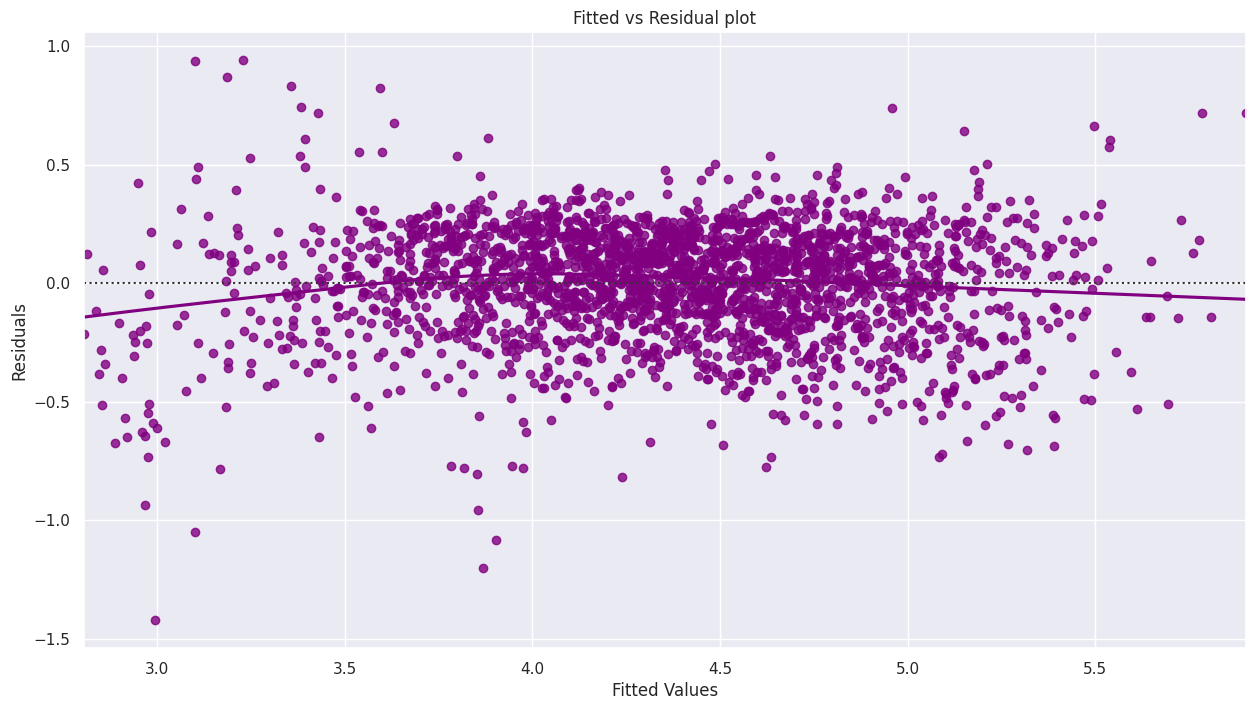

In [234]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Test for Normality

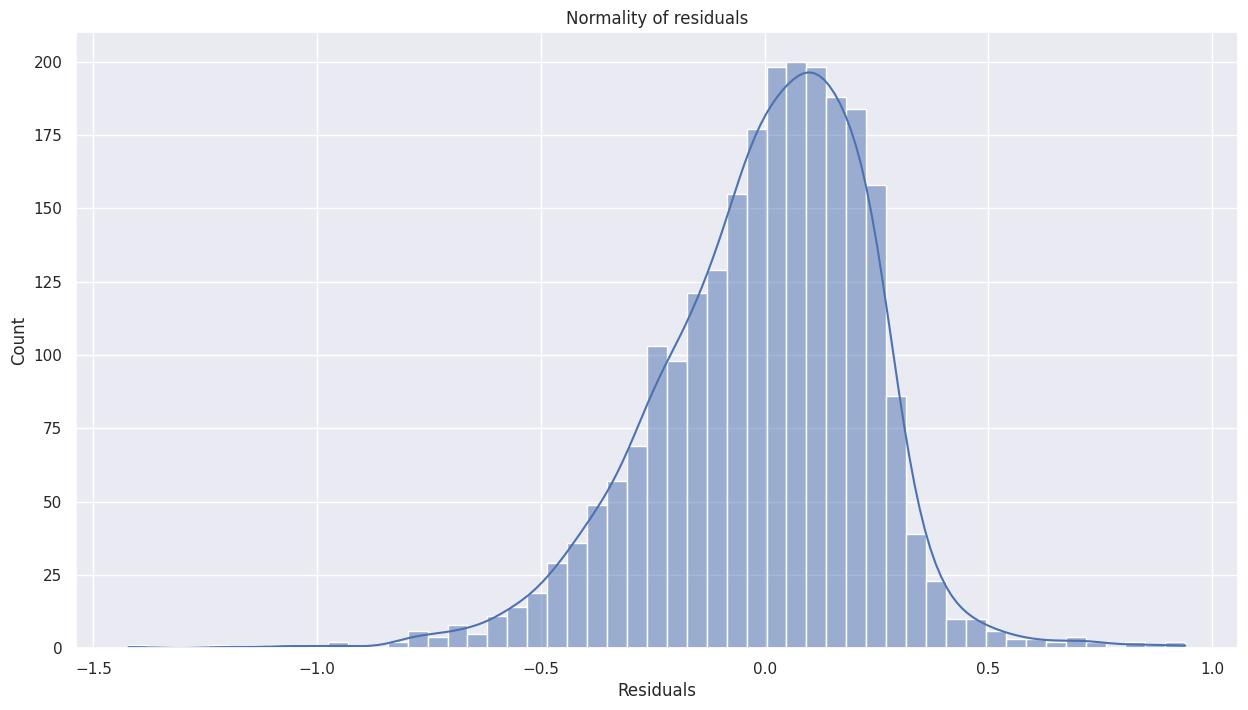

In [235]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Observations:
<br>
The histogram of residuals does have a bell shape.
Let's check the Q-Q plot.

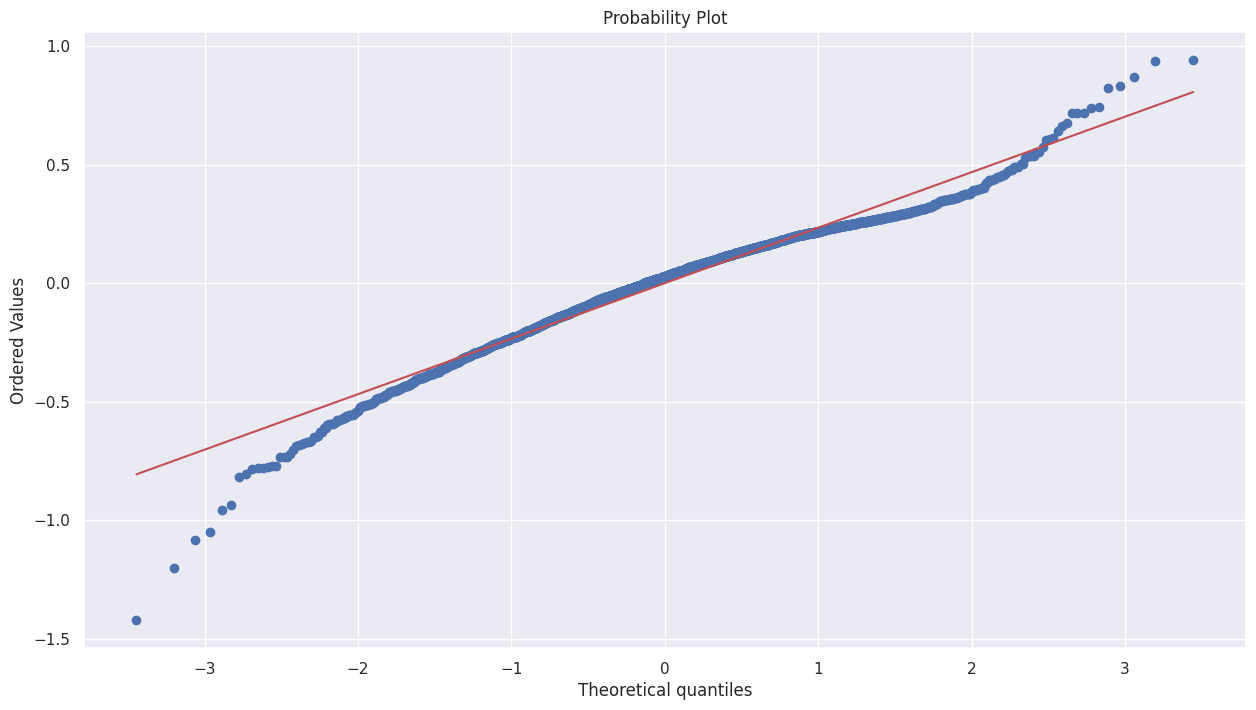

In [236]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [237]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9714740514755249, pvalue=1.5460334824494618e-21)

Observations:
<br>
Although the Shapiro-Wilk test indicates that the residuals are not normally distributed (p-value < 0.05), as an approximation, we can consider this distribution to be close to normal. Therefore, the assumption of normality is satisfied.

Test for Homoscadasticity

In [238]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0375242442322985), ('p-value', 0.26207257449870514)]

Observations:

With a p-value greater than 0.05, we conclude that the residuals exhibit homoscedasticity. Thus, this assumption holds true.

In [239]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.399415
2341,3.696103,3.956856
1913,3.592093,3.711874
688,4.306495,4.110511
650,4.522115,5.134400
2291,4.259294,4.398532
40,4.997685,5.286724
1884,3.875359,4.089647
2538,4.206631,3.985124
45,5.380450,5.398056


Observation:
<br>
We can observe that our model has produced strong prediction results, with actual and predicted values showing close comparability. Additionally, we can visualize this comparison with a bar graph using a sample of 25 records.

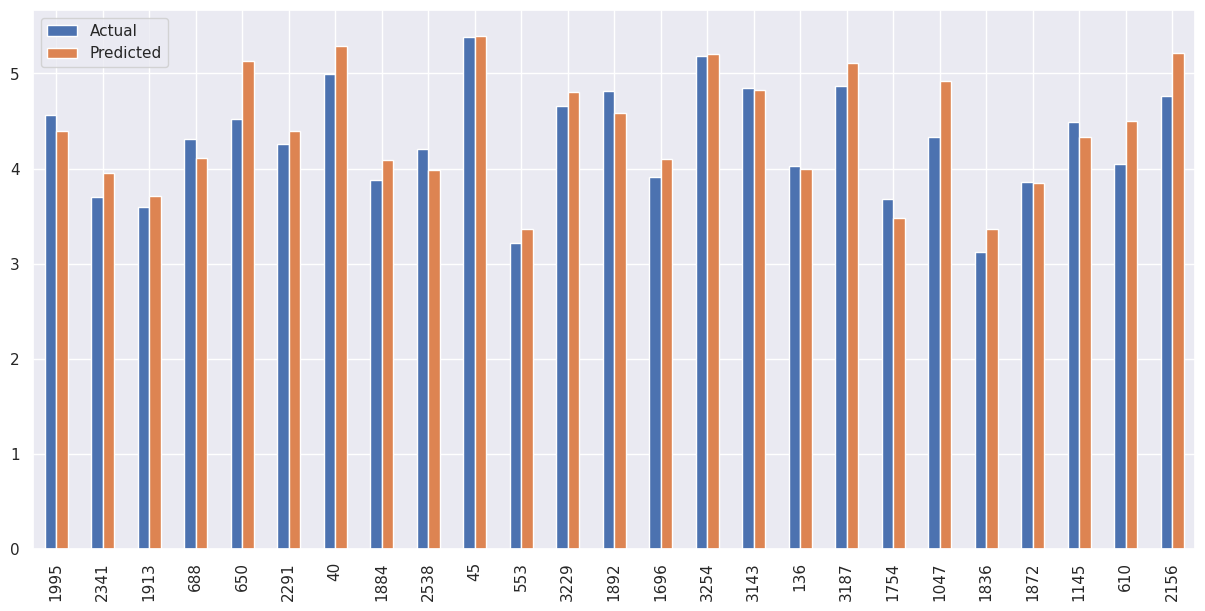

In [240]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model

In [241]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1104.
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                           01:46:58   Log-Likelihood:                 47.172
No. Observations:                   2417   AIC:                            -70.34
Df Residuals:                       2405   BIC:                           -0.8612
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [242]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237294,0.183766,0.834725,0.833831,4.426918


In [243]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243854,0.188278,0.835131,0.833036,4.602394


Summary:
<br>
The model effectively explains approximately 83% of the variance in the data, which is highly satisfactory. Both the train and test root mean square errors (RMSE) and mean absolute errors (MAE) are low and comparable, indicating that our model does not suffer from overfitting. The Mean Absolute Percentage Error (MAPE) on the test set suggests that we can predict used device prices within a 4.6% margin of error, demonstrating strong predictive accuracy.

Therefore, we can confidently conclude that the model, olsmod2, is suitable for both prediction and inference purposes

## Actionable Insights and Recommendations

___


- The normalized_new_price exhibits a strong positive correlation with used device price, indicating that higher prices for new devices correspond to higher prices in the refurbished market.
- An increase of 1 unit in device weight leads to an increase in refurbished device price by 0.2612 euros.
- Factors such as screen size, main camera resolution (megapixels), selfie camera resolution (megapixels), internal memory, RAM, normalized_new_price, weight_log, and 4G connectivity have positive coefficients, meaning their increase is associated with higher used device prices.
- Devices with operating systems other than Android, iOS, and Windows have negative coefficients, indicating lower prices for used devices as these operating systems increase.
  
In summary, the significant factors influencing refurbished device prices include:
- Screen size
- Main camera resolution
- Selfie camera resolution
- Internal memory
- RAM
- Price of similar new devices
- Device weight
- 4G connectivity
- Operating system

Key Takeaway:
Since retailers typically conduct checks and repairs to meet refurbishment standards, factors such as days of use, battery condition, and years since device release do not significantly impact refurbished device prices. Recell should prioritize ensuring devices are repaired to standard rather than worrying excessively about these factors, as repaired devices will find a market.